# Iris data set - PandS Project 2019
Description: This Jupyter Notebook is the project journal, as described in Readme.md file on Git Hub repository.

Context: Programming and Scripting, GMIT, 2019  
Lecturer: dr Ian McLoughlin

> Author: **Andrzej Kocielski**  
> Github: [andkoc001](https://github.com/andkoc001/)  
> Email: G00376291@gmit.ie  

Date of creation: 03-04-2019  
Last update: 22-09-2019

## 1. Environment set up

### Importing external modules and the data set
The following modules will be called up for the execution of the project.

In [1]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

### Uploading the data set from a .csv file

The content of the data set is read from file `iris_dataset.csv` stored in the project folder, originally from <https://archive.ics.uci.edu/ml/datasets/iris>.
The data set from the csv file is assigned to name **`ids`**, which is acronym for iris data set.

By default the first row of data is considered a header. Hence, attribite `header=None` which includes also the first row of data is used.

In [2]:
ids = pd.read_csv("iris_dataset.csv", header=None) # ids is short for iris data set

## 2. Data Set analysis

### Basic data set information

Content of the raw data set

In [3]:
# ids # this prints out the content, commented out for clarity (too long)

Size of the data set array - shows number of instances (i.e. rows) and attributes (i.e. columns, aka features) respectively.

In [4]:
ids.shape # shows number of rows and columns

(150, 5)

Data set type check.

In [5]:
type(ids)

pandas.core.frame.DataFrame

### Adding data set headers

The data set attributes (i.e. columns) represent respectively:  
1. **SL** - sepal length, cm,  
2. **SW** - sepal width, cm,  
3. **PL** - petal length, cm,  
4. **PW** - petal width, cm,  
5. **Species** - species of the iris.

Reference source: https://stackoverflow.com/a/28162530

In [6]:
# Adding headers to attributes (columns)
ids.columns = ["SL", "SW", "PL", "PW", "Species"]

Illustration of the data set, by showing some of the rows (data set instances).

In [7]:
# Showing first n row of the data set
ids.head(3) # if brackets are empty, default n = 5 is assumed

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
# To show instances (rows) between n and m: ids[n:m]
ids[49:51]

,SL,SW,PL,PW,Species
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [9]:
ids.tail(2) #shows last n (5 by default) rows of data sat

,SL,SW,PL,PW,Species
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Basic statistical information about each column of the data set, like minimum, mean, maximum, etc.

In [10]:
ids.describe() # shows basic statistical information of the data set

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data set overview analysis
In this section I look at the entire data set.

Let us remember, that the data set consists of 150 instances in total and three classes (iris species). Each species is described by 50 instanecs.


Pandas command `groupby` allows for separating the data set by attribute (of the function) passed in the attribute (of the method).  

Reference:  
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [11]:
ids.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### Histogram 
Histogram of each attribute (petal lengths and widths and sepal lengths and widths), regardless its class (species).  
References:  
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

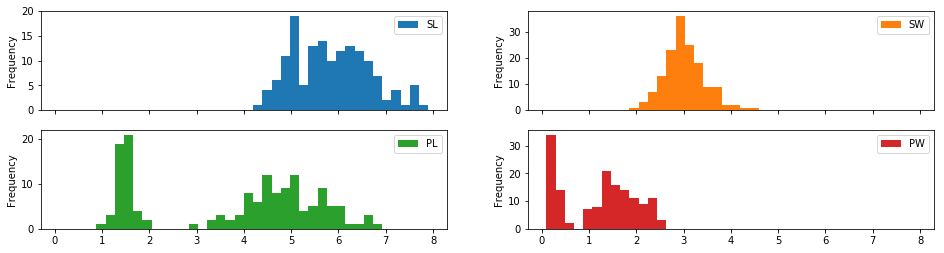

In [12]:
ids.plot(kind='hist', bins=40, subplots=True, layout=(2,2), sharex=True, sharey=False, figsize=(16,4))
pl.show()

From the above histogram, sepal width (SL) shows a symmetric and uniform pattern of values, sepal lengths (SL) has a more staggered pattern, whereas petal lengths (PL) and petal widths (PW) show a clear bimodal distribution of the values.

#### Line plot
Line plot for each attribute of the entire data set.

Reference:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

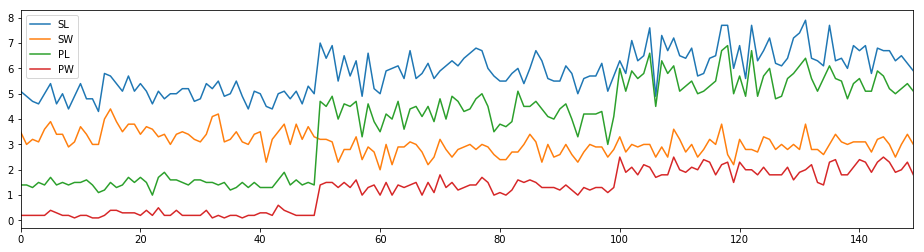

In [13]:
ids.plot(kind='line', figsize=(16,4))
pl.show()

The x-axis denotes instance of sample taken, whereas y-axis - measurement in cm. Instances from 1 to 50 relate to Iris Setosa, 51 to 100 - Iris Versicolor and 101 to 150 - Iris Virginica.

From the above plot some patterns can be distinguished, allowing for the species discrimination when petal looking at petal width and petal length attributes - theres is a noticeable 'jump' of the line at instances 51 and 101. In similar way, sepal length shows discrimination of Setosa species, but Versicolor and Virginica are more difficult distinguish. On the other hand, sepal width do not show any significant pattern, allowing for telling the species apart.

#### Scatter plot matrix

References:  
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

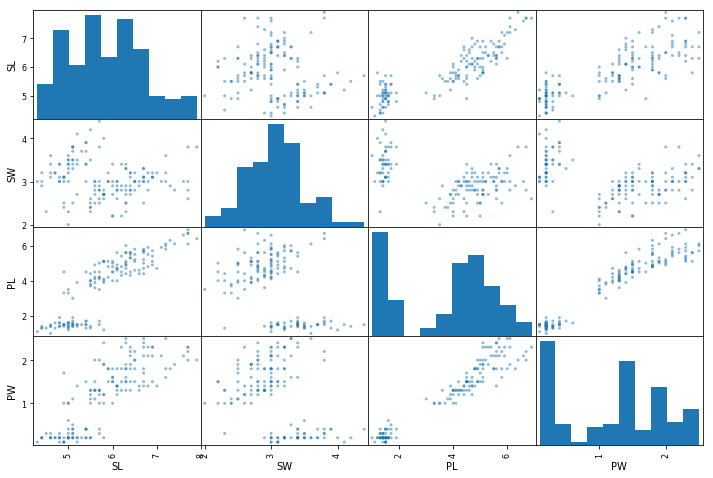

In [14]:
pd.plotting.scatter_matrix(ids,figsize=(12,8))
pl.show()

### Data set separation by classes (iris species)

#### Data set restructure
Setting `Species` as index in order to splice the instances accordingly.
A new name given to the restructured database: `ids2`

In [15]:
ids2 = ids.set_index("Species")
# ids2.head(2) # for checking

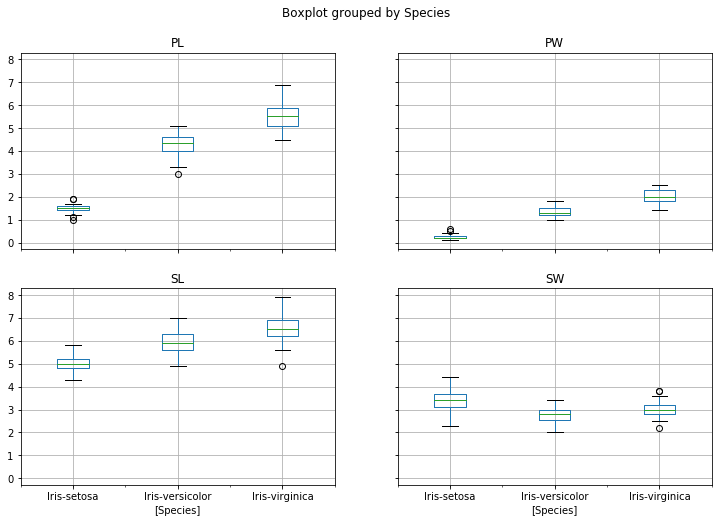

In [16]:
ids2.boxplot(by="Species",figsize=(12,8))
pl.show()

#### Splicing data set by species
New subsets of the data for each species.

In [17]:
setos = ids2.loc["Iris-setosa"]
versi = ids2.loc["Iris-versicolor"]
virgi = ids2.loc["Iris-virginica"]

### Analysis of species data subsets

#### Statistical summary

Iris Setosa subset

In [18]:
setos.describe() # Iris Setosa

,SL,SW,PL,PW
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Iris Versicolor subset

In [19]:
versi.describe() # Iris Versicolor

,SL,SW,PL,PW
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Iris Virginica subset

In [20]:
virgi.describe() # Iris Virginica

,SL,SW,PL,PW
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


#### Data visualisation

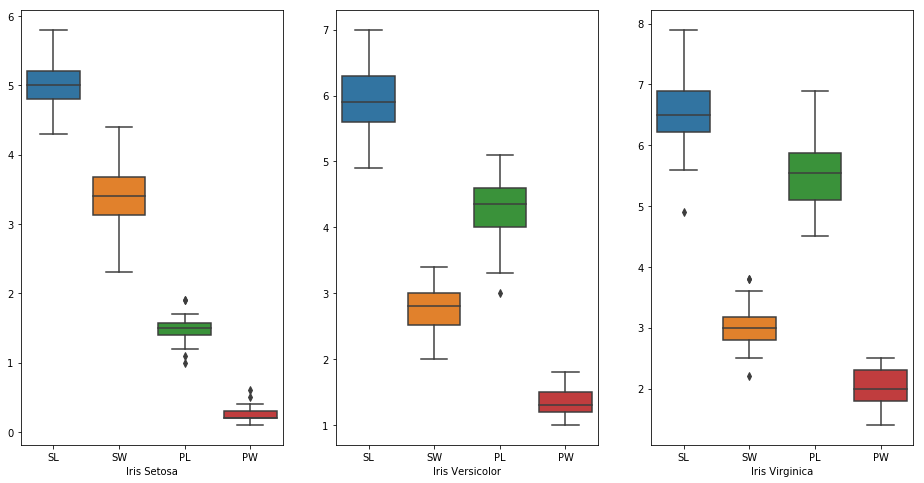

In [21]:
pl.subplots(1, 3, sharey=True, figsize = (16, 8))
pl.subplot(131)
pl.xlabel("Iris Setosa")
# pl.ylabel("measurement, cm")
sns.boxplot(data=setos) # Iris Setosa subset
pl.subplot(132)
pl.xlabel("Iris Versicolor")
sns.boxplot(data=versi) # Iris Versicolor subset
pl.subplot(133)
pl.xlabel("Iris Virginica")
sns.boxplot(data=virgi) # Iris Virginica subset
pl.show()

#### Multiple line regression

Adopted from https://seaborn.pydata.org/examples/multiple_regression.html.

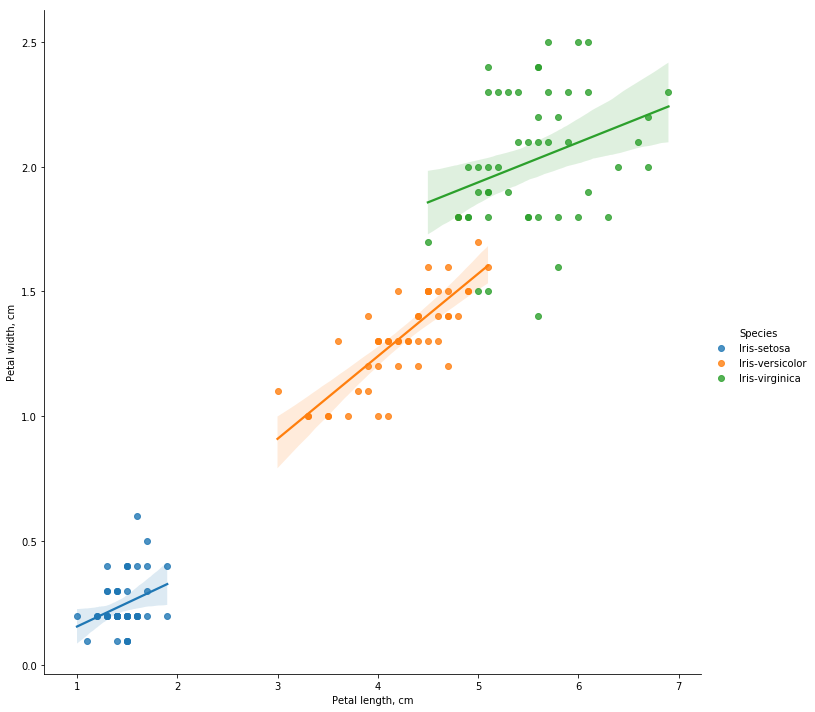

In [22]:
# Source code adapted from https://seaborn.pydata.org/examples/multiple_regression.html.

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="PL", y="PW", hue="Species",
               truncate=True, height=10, data=ids)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Petal length, cm", "Petal width, cm")
pl.show()

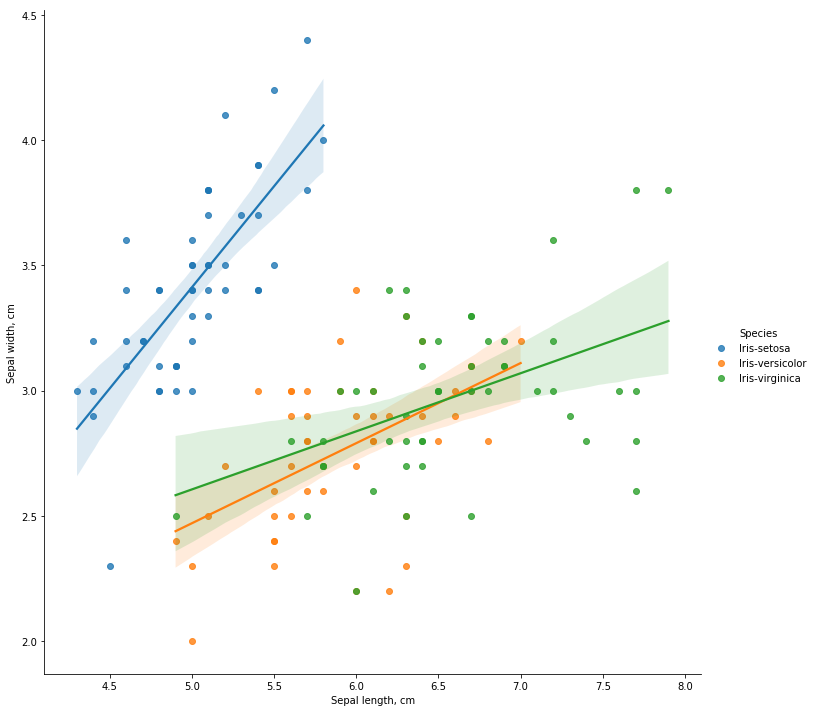

In [23]:
# Source code adapted from https://seaborn.pydata.org/examples/multiple_regression.html.

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="SL", y="SW", hue="Species",
               truncate=True, height=10, data=ids)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length, cm", "Sepal width, cm")
pl.show()

#### Linear regression for each species

Below is Iris Setosa correlation between:  
a) petal length and width (upper plot),  
b) sepal length and width (lower plot).

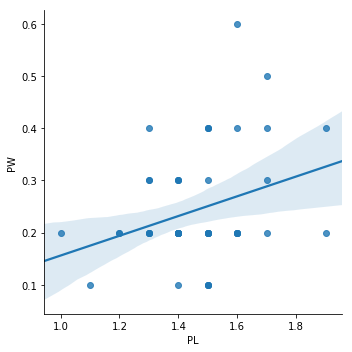

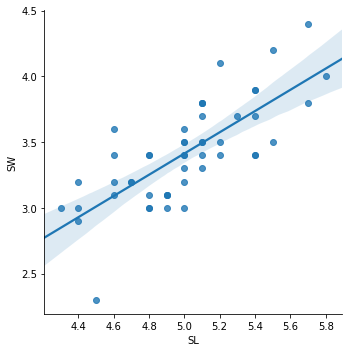

In [24]:
sns.lmplot(x="PL", y="PW", data=setos)
pl.show()
sns.lmplot(x="SL", y="SW", data=setos)
pl.show()

Below is Iris Versicolor correlation between:  
a) petal length and width (upper plot),  
b) sepal length and width (lower plot).

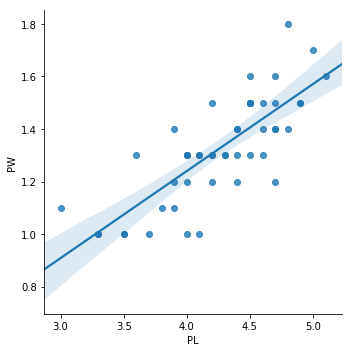

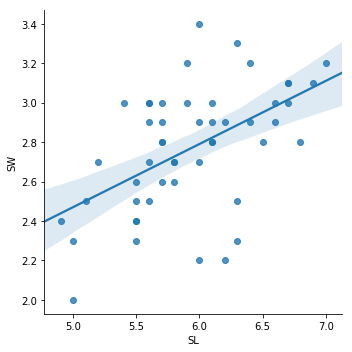

In [25]:
sns.lmplot(x="PL", y="PW", data=versi)
pl.show()
sns.lmplot(x="SL", y="SW", data=versi)
pl.show()

Below is Iris Virginica correlation between:  
a) petal length and width (upper plot),  
b) sepal length and width (lower plot).

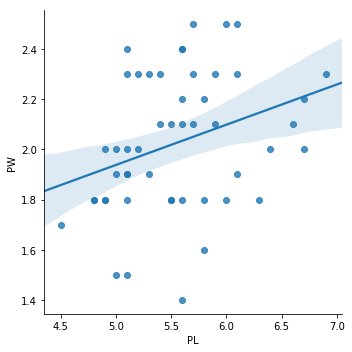

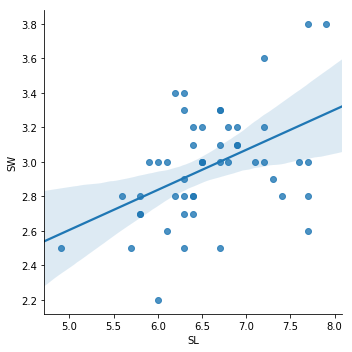

In [26]:
sns.lmplot(x="PL", y="PW", data=virgi)
pl.show()
sns.lmplot(x="SL", y="SW", data=virgi)
pl.show()